<a href="https://colab.research.google.com/github/RChandana/ZeotapAssignment/blob/main/Zeotap_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

# Data Loading and Inspection
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [8]:
# Data Cleaning

customers.drop_duplicates(inplace=True)
products.dropna(subset=['Price'], inplace=True)
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [9]:
# Data Merging

merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

In [10]:
# Descriptive Statistics

print(merged_data.describe())

                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

          Price_y  
count  1000.00000  
mean    272.55407  
min      16.08000  
25%     147.95000  
50%     299.93000  
75%     404.40000  
max     497.76000  
std     140.73639  


In [11]:
customers_info = customers.info(), customers.head()
transactions_info = transactions.info(), transactions.head()
products_info = products.info(), products.head()

customers_info, transactions_info, products_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns]

((None,
    CustomerID        CustomerName         Region  SignupDate
  0      C0001    Lawrence Carroll  South America  2022-07-10
  1      C0002      Elizabeth Lutz           Asia  2022-02-13
  2      C0003      Michael Rivera  South America  2024-03-07
  3      C0004  Kathleen Rodriguez  South America  2022-10-09
  4      C0005         Laura Weber           Asia  2022-08-15),
 (None,
    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
  0        T00001      C0199      P067 2024-08-25 12:38:23         1   
  1        T00112      C0146      P067 2024-05-27 22:23:54         1   
  2        T00166      C0127      P067 2024-04-25 07:38:55         1   
  3        T00272      C0087      P067 2024-03-26 22:55:37         2   
  4        T00363      C0070      P067 2024-03-21 15:10:10         3   
  
     TotalValue   Price  
  0      300.68  300.68  
  1      300.68  300.68  
  2      300.68  300.68  
  3      601.36  300.68  
  4      902.04  300.68  ),
 (None,
    Produ

# EDA (Exploratory Data Analysis)

#### Summary statistics

In [12]:
print("Customers Dataset Summary:")
print(customers.describe(include="all"))
print("\nTransactions Dataset Summary:")
print(transactions.describe(include="all"))
print("\nProducts Dataset Summary:")
print(products.describe(include="all"))

Customers Dataset Summary:
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Transactions Dataset Summary:
       TransactionID CustomerID ProductID                TransactionDate  \
count           1000       1000      1000                           1000   
unique          1000        199       100                            NaN   
top           T00001      C0109      P059                            NaN   
freq               1         11        19                            NaN   
mean             NaN        NaN       NaN  2024-06-23 15:33:02.768999936   
min              NaN        NaN       NaN            2023-12-30 15:29:12   
25%              NaN        NaN       NaN     2024-03-25 22:05:34.500000   
50%              Na

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

#### Customer Distribution by Region

<ipython-input-14-17569a694667>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='Set2', order=customers['Region'].value_counts().index)


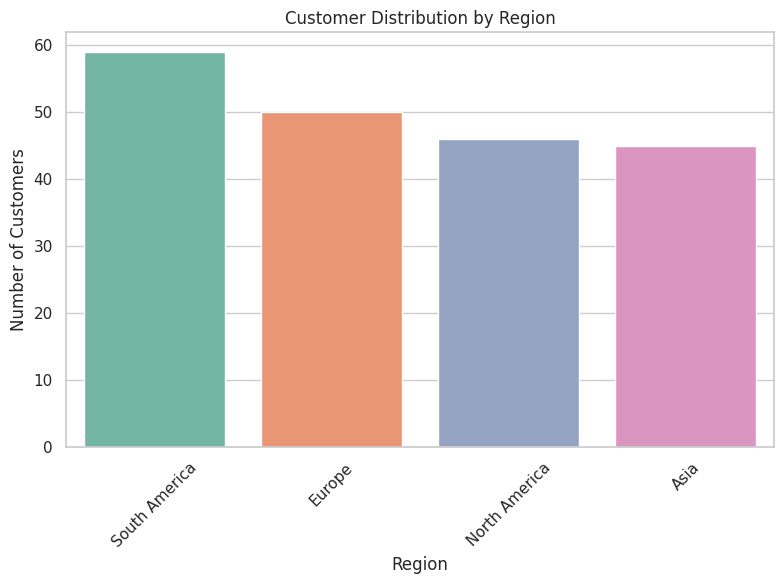

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(data=customers, x='Region', palette='Set2', order=customers['Region'].value_counts().index)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Transaction Volume over Time

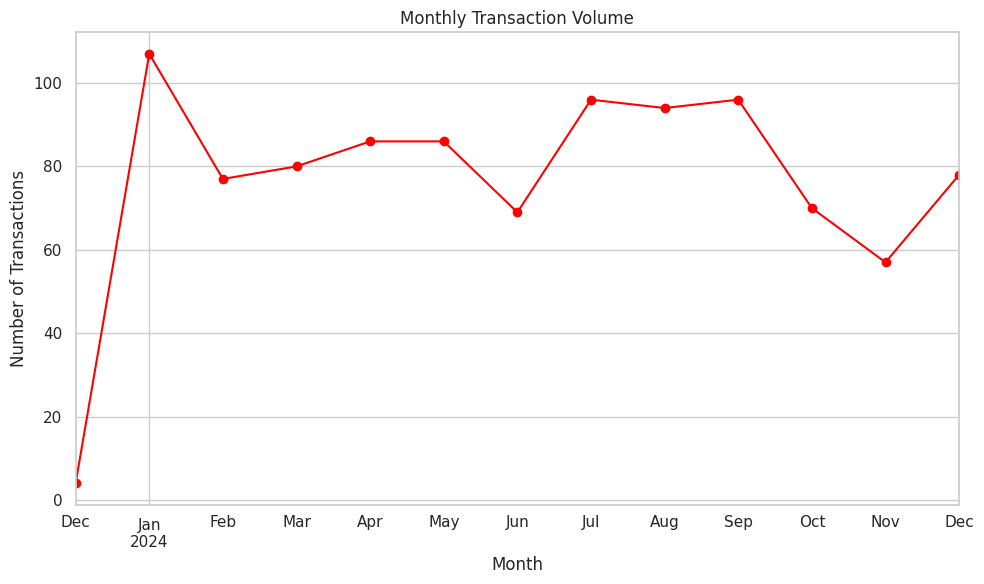

In [15]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions['TransactionMonth'] = transactions['TransactionDate'].dt.to_period('M')

monthly_transactions = transactions.groupby('TransactionMonth').size()

plt.figure(figsize=(10, 6))
monthly_transactions.plot(kind='line', marker='o', color='red')
plt.title('Monthly Transaction Volume')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Product Distribution by Category

<ipython-input-16-d67ec034af7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products, y='Category', palette='Set3', order=products['Category'].value_counts().index)


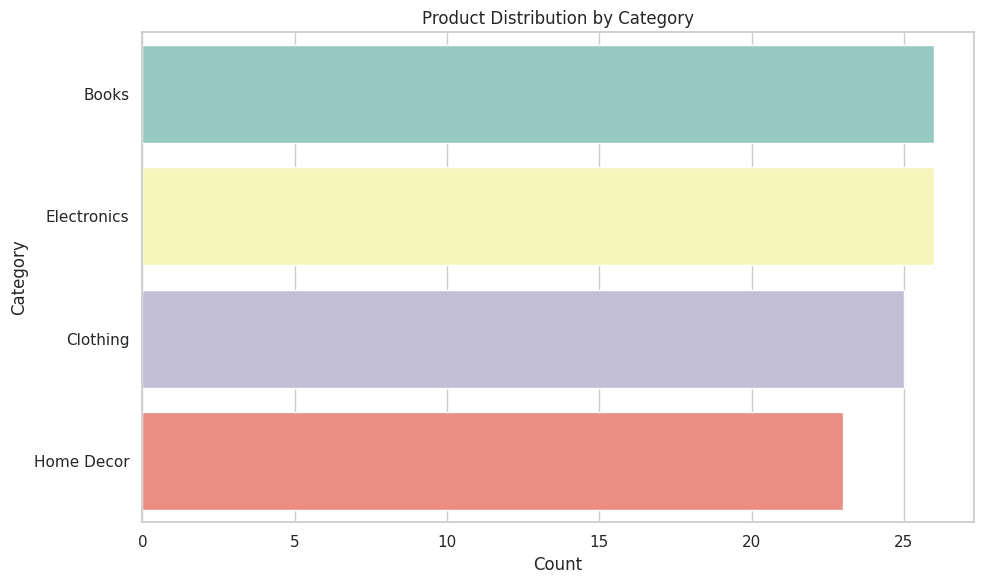

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=products, y='Category', palette='Set3', order=products['Category'].value_counts().index)
plt.title('Product Distribution by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

#### Correlation Matrix for Transactions

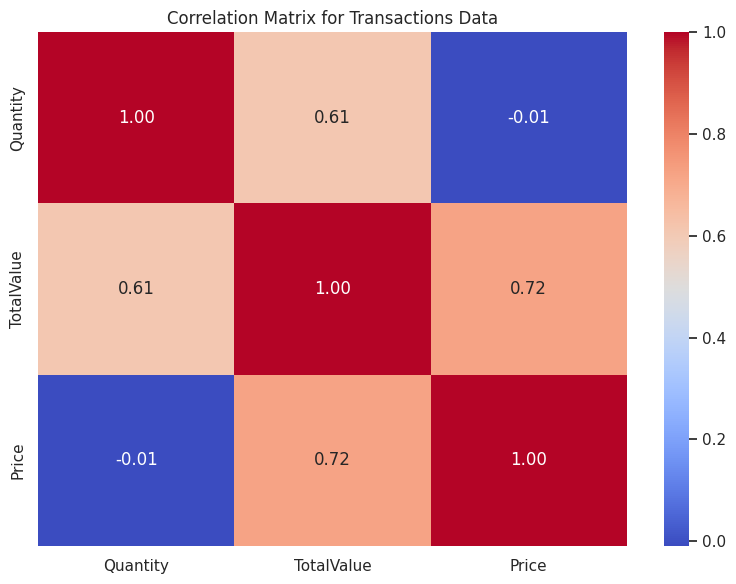

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(transactions[['Quantity', 'TotalValue', 'Price']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Transactions Data')
plt.tight_layout()
plt.show()